In [1]:
import sys
sys.path.append('/Users/cheng/Google Drive/PhD/Research/Portfolio Selection via TBN/codes/')
from module.backtesting_old import *
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt

# Norm compairson between TBN and correlation matrix

In [2]:
backtest_agent = vectorized_backtesting()
tbn_total = backtest_agent.tbn_combined
correlation_matrix_total = backtest_agent.correlation_aggregate

In [3]:
def get_norm_time_series(start_year = 1996, end_year = 2017):
    '''
    Compute matrix norm for TBN and sample correlation matrix in a time period.
    Returns:
        df_total: pd.DataFrame
                A (N x 6) dataframe of matrix norm in N year sample. 
                It consists of 3 level norm for both TBN and correlation.
    '''
    year_range = range(start_year, end_year + 1)

    norm_dict = {1: 1, 2: 2, 'inf': np.inf}
    norm_list = norm_dict.values()

    norm_name_list_tbn = ['TBN 1-norm', 'TBN 2-norm', 'TBN inf-norm']
    norm_name_list_correlation = ['Correlation 1-norm', 'Correlation 2-norm', 'Correlation inf-norm']

    norm_time_series_tbn = [[LA.norm(tbn_total.loc[year], norm) for year in year_range] for norm in norm_list]
    norm_time_series_correlation = [[LA.norm(correlation_matrix_total.loc[year], norm) for year in year_range] for norm in norm_list]

    df_tbn = pd.DataFrame(norm_time_series_tbn, columns=year_range, index=norm_name_list_tbn)
    df_correlation = pd.DataFrame(norm_time_series_correlation, columns=year_range, index=norm_name_list_correlation)
    df_total = pd.concat([df_tbn, df_correlation]).T

    return df_total

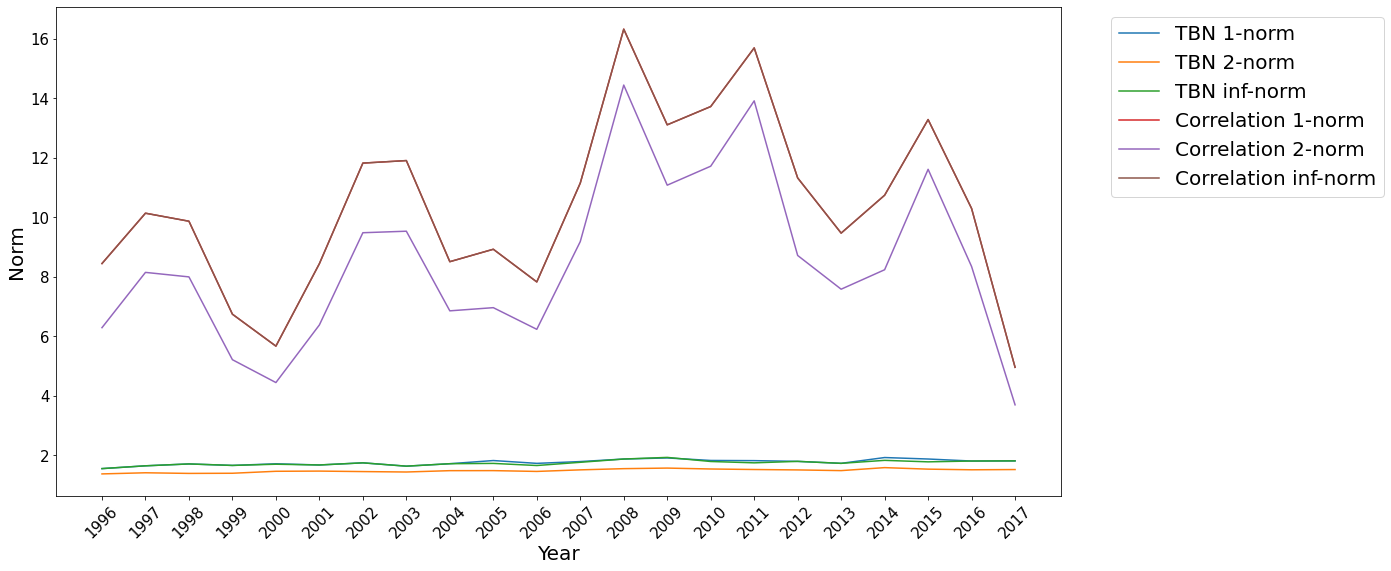

In [4]:
norm_time_series_df = get_norm_time_series()

plot = norm_time_series_df.plot(title = None,
                                xlabel = 'Year',
                                ylabel = 'Norm',
                                figsize = (18, 9),
                                fontsize = 15,
                                xticks = range(1996, 2018),
                                rot = 45)
plot.axes.xaxis.label.set_size(20)
plot.axes.yaxis.label.set_size(20)
plot.legend(bbox_to_anchor=(1.04,1), loc="upper left", prop={'size': 20})

In [5]:
output_path = '/Users/cheng/Dropbox/Apps/Overleaf/Portfolio Selection via Text Based Network/picture/'
file_name = 'Matrix norm time series on TBN and correlation matrix'
file_type = '.png'
plot.figure.tight_layout()
plot.figure.savefig(output_path + file_name + file_type)

## Time series difference

We want to see how matrix norm change along with the time. This also indicates the stability of correlation matrix and TBN

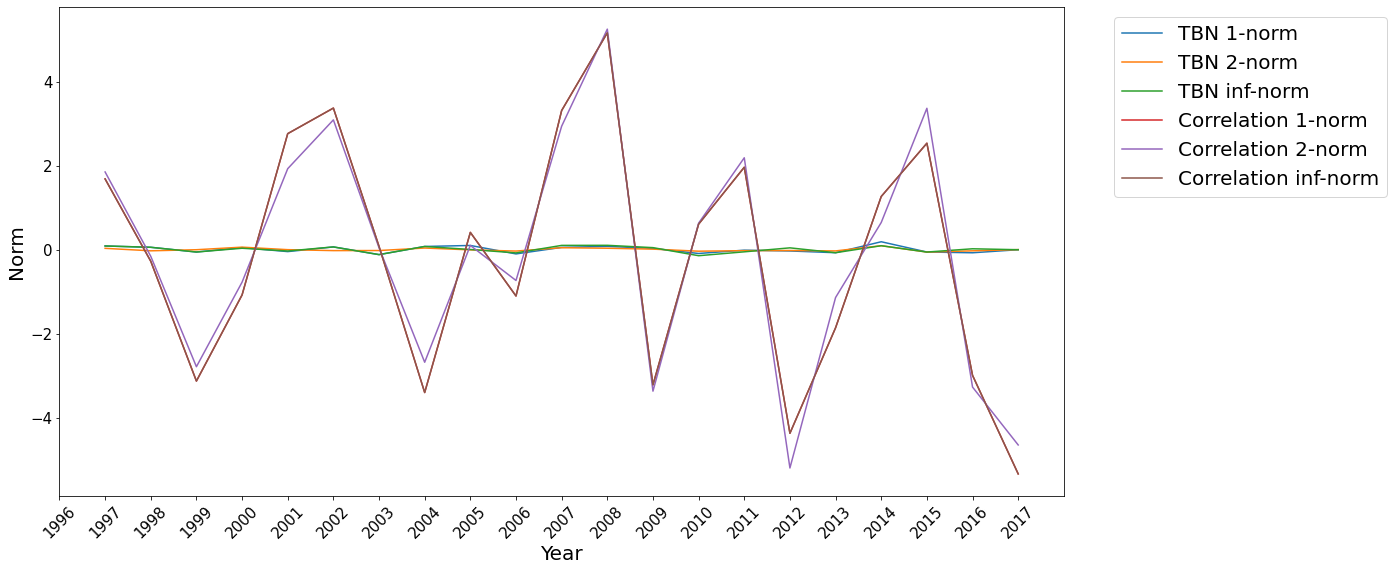

In [6]:
norm_time_series_diff_df = norm_time_series_df.diff(periods=1)
plot = norm_time_series_diff_df.plot(title = None,
                                    xlabel = 'Year',
                                    ylabel = 'Norm',
                                    figsize = (18, 9),
                                    fontsize = 15,
                                    xticks = range(1996, 2018),
                                    rot = 45)
plot.axes.xaxis.label.set_size(20)
plot.axes.yaxis.label.set_size(20)
plot.legend(bbox_to_anchor=(1.04,1), loc="upper left", prop={'size': 20})

In [ ]:
output_path = '/Users/cheng/Dropbox/Apps/Overleaf/Portfolio Selection via Text Based Network/picture/'
file_name = 'Matrix norm time series difference on TBN and correlation matrix'
file_type = '.png'
plot.figure.tight_layout()
plot.figure.savefig(output_path + file_name + file_type)

# Represent bias using matrix norms

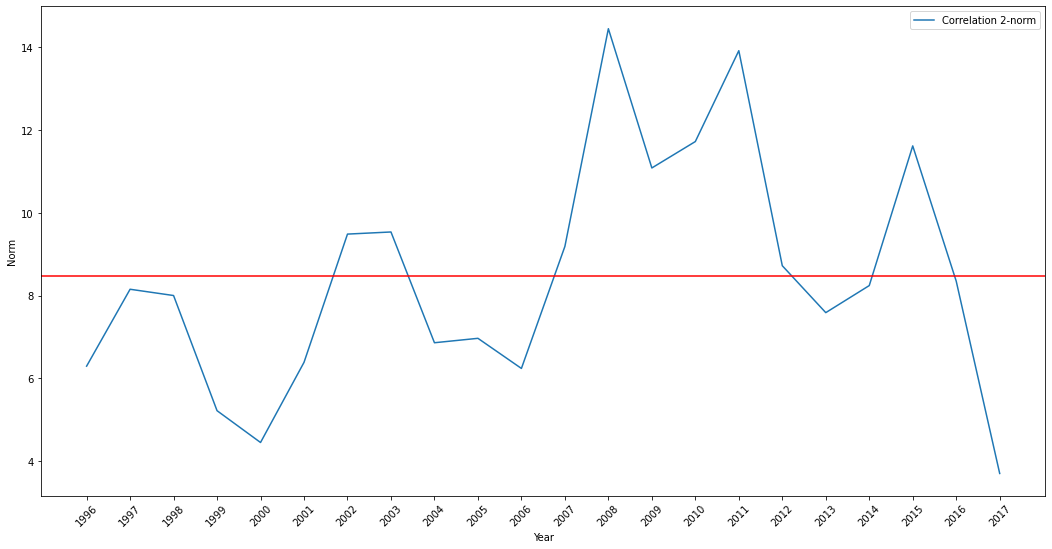

In [16]:
# plt.plot(norm_time_series_df['Correlation 2-norm'])
ax = norm_time_series_df['Correlation 2-norm'].plot(title = None,
                                    xlabel = 'Year',
                                    ylabel = 'Norm',
                                    figsize = (18, 9),
                                    xticks = range(1996, 2018),
                                    rot = 45)
plt.axhline(y=norm_time_series_df['Correlation 2-norm'].mean(), color='r', linestyle='-')
plt.legend()

In [20]:
output_path = '/Users/cheng/Dropbox/Apps/Overleaf/Portfolio Selection via Text Based Network/picture/'
file_name = 'Bias of Sample Correlation Matrix'
file_type = '.png'
ax.figure.savefig(output_path + file_name + file_type)

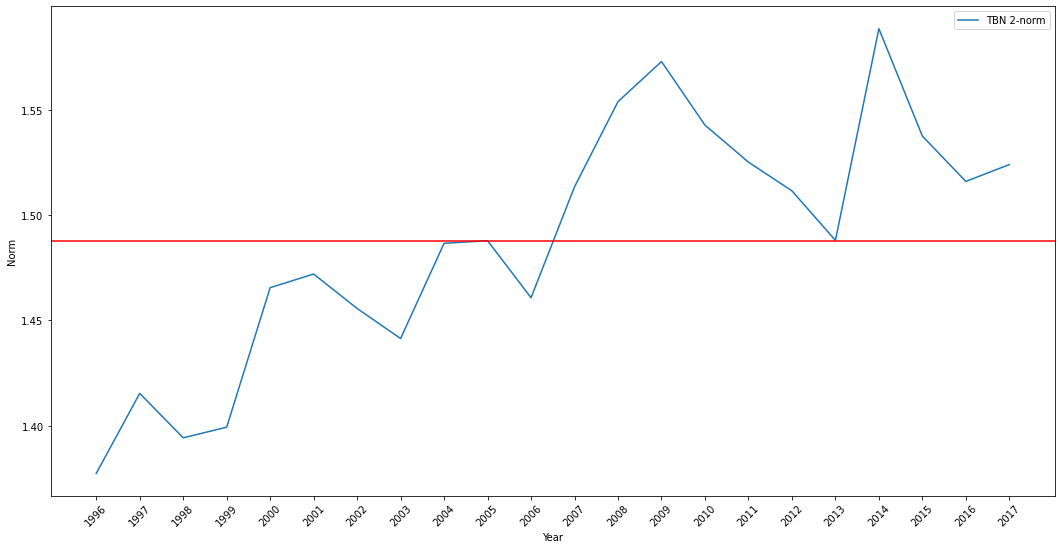

In [21]:
ax = norm_time_series_df['TBN 2-norm'].plot(title = None,
                                    xlabel = 'Year',
                                    ylabel = 'Norm',
                                    figsize = (18, 9),
                                    xticks = range(1996, 2018),
                                    rot = 45)
plt.axhline(y=norm_time_series_df['TBN 2-norm'].mean(), color='r', linestyle='-')
plt.legend()

In [22]:
output_path = '/Users/cheng/Dropbox/Apps/Overleaf/Portfolio Selection via Text Based Network/picture/'
file_name = 'Bias of TBN'
file_type = '.png'
ax.figure.savefig(output_path + file_name + file_type)